### 0. Importing the libraries

In this case we are going to import pandas, numpy and matplotlib.pyplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Online deliveries dataset

drop duplicate rows, and inspect the data.

https://www.kaggle.com/benroshan/online-food-delivery-preferencesbangalore-region/version/3

In [3]:
dataset_with_duplicates = pd.read_csv("onlinedeliverydata.csv")

dataset=dataset_with_duplicates.drop_duplicates()

dataset.sample(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
226,21,Female,Single,Student,No Income,Post Graduate,3,12.9149,77.5635,560070,...,Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,The delivery to my locations are done pretty fast
73,23,Male,Single,Student,No Income,Post Graduate,2,12.8845,77.6036,560076,...,Important,Very Important,Slightly Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
180,29,Female,Married,Employee,More than 50000,Graduate,3,12.9570,77.5637,560018,...,Important,Moderately Important,Moderately Important,Moderately Important,Slightly Important,Moderately Important,Important,Moderately Important,No,I want both delivery to be quick as well as fo...
158,27,Male,Married,Employee,More than 50000,Ph.D,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Very Important,Very Important,Very Important,Very Important,Very Important,No,Worst behavior by customer care. They process ...
258,23,Male,Single,Student,No Income,Post Graduate,3,12.9967,77.7582,560067,...,Very Important,Very Important,Very Important,Very Important,Important,Very Important,Important,Very Important,Yes,I'm satisfied with the service of swiggy
146,23,Male,Single,Student,More than 50000,Post Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
293,25,Female,Married,Employee,More than 50000,Graduate,1,12.9770,77.5773,560009,...,Important,Important,Very Important,Very Important,Important,Important,Very Important,Very Important,No,poor delivery men really rushing fast to deliv...
271,21,Female,Single,Employee,Below Rs.10000,Graduate,2,12.9925,77.5633,560021,...,Important,Important,Very Important,Important,Very Important,Very Important,Very Important,Very Important,No,very late deliveries to my house everytime i o...
99,32,Female,Married,House wife,No Income,Uneducated,3,13.0140,77.5658,560012,...,Important,Important,Important,Very Important,Important,Very Important,Important,Slightly Important,No,Expect the delivery person to understand our h...
159,20,Female,Single,Student,No Income,Graduate,2,12.9337,77.5900,560011,...,Important,Very Important,Important,Moderately Important,Important,Important,Moderately Important,Important,Yes,Best delivery people working hard for their fa...


### 2. Data cleaning

Subset the dataset for finding marteting target, target
    - Age
    - Gender
    - Marital Status
    - Occupation   
    - Educational Qualifications
    - Family size

<AxesSubplot:>

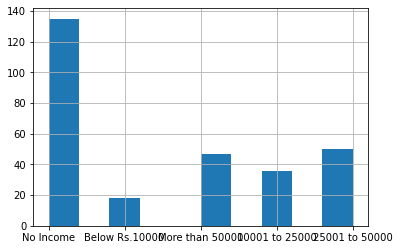

In [4]:
# It is dusious that users input their actual income into the site. 
dataset['Monthly Income'].hist()

In [5]:
target = dataset[['Age','Gender','Marital Status','Occupation','Educational Qualifications','Family size']]
target.sample(5)

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size
73,23,Male,Single,Student,Post Graduate,2
137,33,Male,Married,Employee,Ph.D,5
134,19,Female,Single,Student,Graduate,4
297,22,Male,Single,Employee,Graduate,1
153,21,Male,Single,Student,Graduate,2


### 3. Correcting data types

Subset the dataset for finding business strategy
    - Less Delivery time
    - High Quality of package
    - Number of calls
    - Politeness
    - Freshness
    - Temperature
    - Good Taste
    - Good Quantity

In [6]:
strategy= dataset[['Less Delivery time','High Quality of package','Number of calls','Politeness','Freshness ','Temperature','Good Taste ','Good Quantity']]
strategy.sample(10)

,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity
11,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important
132,Important,Very Important,Very Important,Very Important,Important,Important,Important,Important
369,Important,Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
92,Very Important,Important,Very Important,Important,Moderately Important,Important,Important,Moderately Important
171,Important,Very Important,Important,Important,Moderately Important,Important,Moderately Important,Important
22,Very Important,Important,Slightly Important,Slightly Important,Very Important,Important,Important,Important
66,Slightly Important,Important,Important,Moderately Important,Moderately Important,Very Important,Very Important,Very Important
219,Important,Moderately Important,Moderately Important,Slightly Important,Important,Moderately Important,Important,Important
238,Important,Moderately Important,Important,Moderately Important,Moderately Important,Important,Moderately Important,Moderately Important
108,Important,Very Important,Slightly Important,Very Important,Slightly Important,Slightly Important,Important,Important


In [7]:
# 'Moderately Important', 'Very Important', 'Important','Slightly Important', 'Unimportant'

strategy_no=strategy.replace(to_replace=['Very Important','Moderately Important','Important','Slightly Important', 'Unimportant'],value=[5,4,3,2,1])
strategy_no

,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity
0,4,4,4,4,4,4,4,4
1,5,5,5,5,5,5,5,5
2,3,5,4,5,5,3,5,4
3,5,3,4,5,5,5,5,3
4,3,3,4,3,3,3,5,5
...,...,...,...,...,...,...,...,...
299,3,3,5,5,3,5,5,5
321,3,3,5,3,4,3,3,4
342,1,2,1,1,5,5,5,5
363,3,3,5,3,4,3,3,4


In [8]:
# check data type
print(strategy_no.dtypes)

Less Delivery time         int64
High Quality of package    int64
Number of calls            int64
Politeness                 int64
Freshness                  int64
Temperature                int64
Good Taste                 int64
Good Quantity              int64
dtype: object


### 4. Exploring app categories

(1) Target Users
(2) Menu size
(3) Customer's Priority

<AxesSubplot:>

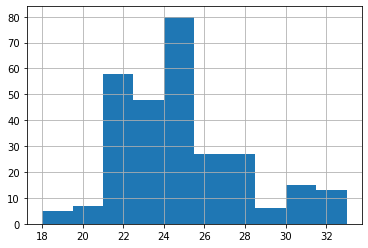

In [9]:
# Most users who place online orders are in their early 20s.
target['Age'].hist(bins=10)

In [10]:
# Male users are about 30% more female users.
target['Gender'].value_counts()

Male      164
Female    122
Name: Gender, dtype: int64

In [11]:
# Single users are about 200% more married users.
target['Marital Status'].value_counts()

Single               192
Married               85
Prefer not to say      9
Name: Marital Status, dtype: int64

In [12]:
# Student users are half of whole users.
target['Occupation'].value_counts()

Student           147
Employee           93
Self Employeed     37
House wife          9
Name: Occupation, dtype: int64

In [22]:
# Most users are highly educated people.
target['Educational Qualifications'].value_counts()

Post Graduate    130
Graduate         122
Ph.D              21
School            11
Uneducated         2
Name: Educational Qualifications, dtype: int64

In [24]:
# Single-person families have a small proportion, and families with three or more people place a lot of orders.
target['Family size'].value_counts()

3    89
2    74
4    44
5    39
6    22
1    18
Name: Family size, dtype: int64

560009    25
560038    10
560010     9
560066     8
560029     7
          ..
560049     1
560073     1
560104     1
560019     1
560072     1
Name: Pin code, Length: 77, dtype: int64

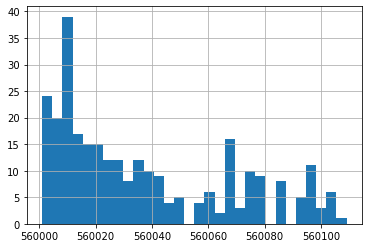

In [25]:
# Single-person families have a small proportion, and families with three or more people place a lot of orders.
dataset['Pin code'].hist(bins=30)
dataset['Pin code'].value_counts()

In [16]:
# Top priority is 'Good Taste','Good Quantity' and 'High Quality of Package'
strategy_srt=strategy_no.mean().sort_values(ascending=False)
strategy_srt

Good Taste                 3.951049
Good Quantity              3.891608
High Quality of package    3.804196
Temperature                3.786713
Freshness                  3.695804
Politeness                 3.625874
Number of calls            3.486014
Less Delivery time         3.335664
dtype: float64